# SD-TSIA 204 TP 2
### Denis Fouchard

In [51]:
# Change here using YOUR own first and last names
fn1 = "denis"
ln1 = "fouchard"
filename = "_".join(map(lambda s: s.strip().lower(),
                    ["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"
filename

'sd-tsia204_lab2_fouchard_denis.ipynb'

In [52]:
#Imports
import numpy as np
import random as rd
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns  #For matrix plots
import warnings # to ignore warnings on lasso
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from copy import deepcopy


### Question 1

In [53]:
# Setting all random seeds to 0
np.random.seed(0)
rd.seed(0)

In [54]:
df = pd.read_csv("meatspec.csv")
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,fat
0,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,...,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920,22.5
1,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,...,3.29186,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942,40.1
2,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,...,2.68951,2.67009,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816,8.4
3,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,...,2.97367,2.94951,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622,5.9
4,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,...,3.30025,3.27907,3.25831,3.23784,3.21765,3.19766,3.17770,3.15770,3.13753,25.5


Here are the mean, standard deviation of all the covariate V1 to V100.

In [55]:
stats = df.describe().loc[["mean", "std"]]
stats

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,fat
mean,2.808561,2.811137,2.813727,2.816363,2.819098,2.821983,2.825064,2.828375,2.831943,2.835813,...,3.178262,3.158254,3.138534,3.119104,3.099971,3.08107,3.062290,3.043548,3.024895,18.142326
std,0.410793,0.413352,0.415906,0.418465,0.421040,0.423635,0.426245,0.428866,0.431510,0.434195,...,0.541957,0.541776,0.541519,0.541135,0.540563,0.53973,0.538586,0.537108,0.535354,12.740297


The data is clearly neither centered nor normalized or standardized.

In [56]:
#Splitting data
X = df.loc[:, df.columns != "fat"]
y = df["fat"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [57]:
#Standardizing data
scaler1, scaler2 = preprocessing.StandardScaler(), preprocessing.StandardScaler()
X_train = scaler1.fit_transform(X_train)
X_test = scaler1.transform(X_test)
y_train = scaler2.fit_transform(np.array(y_train).reshape(-1,1))
y_test = scaler2.transform(np.array(y_test).reshape(-1,1))

In [58]:
print("X_train : ", "mean=", X_train.mean(), "std=", X_train.std())
print("X_test : ", "mean=", X_test.mean(), "std=", X_test.std())
print("y_train : ", "mean=", y_train.mean(), "std=", y_train.std())
print("y_test : ", "mean=", y_test.mean(), "std=", y_test.std())

X_train :  mean= 2.134938188968624e-17 std= 1.0
X_test :  mean= 0.13295980338752503 std= 0.8788111703695042
y_train :  mean= 2.2066544588822986e-17 std= 0.9999999999999998
y_test :  mean= 0.008787866497266504 std= 1.0020786313975028


d) As we have centered the data, the intercept is 0 so we don't have to fit it.

In [59]:
reg = LinearRegression(fit_intercept=False).fit(X_train, y_train)
reg.coef_

array([[ 3.26788372e+02, -2.65147231e+02, -6.49770215e+02,
         1.56508427e+03, -1.86777971e+03,  1.18017547e+03,
        -7.23843419e+02,  3.56584868e+02,  1.04409417e+02,
        -2.31286290e+02, -1.68698350e+02,  1.53975162e+03,
        -1.79304229e+03,  1.23138401e+03, -5.87599896e+02,
        -3.11315315e+02, -3.06125985e-01,  3.10041307e+02,
         5.83704196e+02, -6.84632438e+02, -9.66918794e+02,
         2.06177642e+03, -7.91814258e+02, -9.39468234e+02,
         9.48597488e+02, -1.78686106e+02, -5.92809347e+01,
         7.34297959e+02, -1.58570299e+03,  1.24925560e+03,
        -5.88650909e+02,  4.44384946e+02, -1.25120255e+02,
        -6.64703414e+01, -5.20370753e+02,  4.49277395e+02,
        -9.18801073e+01, -1.95555463e+02,  1.13059830e+03,
        -1.56930471e+03,  1.73402235e+03, -1.68810384e+03,
         9.29178200e+02, -6.58908798e+02,  7.26246231e+02,
        -8.07490401e+01, -2.93634391e+02,  1.07653397e+02,
         2.97962966e+02, -1.24102298e+03,  1.75122510e+0

In [60]:
reg.intercept_

0.0

In [61]:
df_coef = pd.DataFrame(index=["R2 Score"])
df_coef["OLS"] = [reg.score(X_test, y_test)]
df_coef

,OLS
R2 Score,0.960055


### Question 2

In [62]:
def stat(y, y_pred, x, theta):
    n = len(y)
    cov = np.stack((np.ones(n), x), axis=1)
    G_hat = cov.T @ cov / n
    s_hat = np.sqrt(np.linalg.inv(G_hat)[0][0])
    sigma = np.linalg.norm(y-y_pred)**2/(n-2)
    T = np.sqrt(n) * np.linalg.norm(theta, 1) / (s_hat * sigma)
    #(np.sqrt(n)*abs(theta)/np.sqrt(sigma2))
    return T

In [63]:
def forward_variable_selection(X_train, y_train, debug=False):
    r = LinearRegression()
    X_t = deepcopy(X_train)
    y_t = deepcopy(y_train)
    p = X_t.shape[1] #Number of features

    t_stat, pvalues = [], []
    theta_best = 0
    max_T_hat = 0
    features_indexes = deepcopy(X.columns) #Keep track of variables
    features_indexes_selected = []

    while p > 0:
        max_T_hat = 0

        for i in range(p):
            V_i = np.array(X_t[:,i]).reshape(-1,1)
            reg = r.fit(V_i, y_t)
            theta = reg.coef_
            y_pred = theta*V_i

            T_hat = stat(y_t.flatten(), y_pred.flatten(), V_i.flatten(), theta)
            if T_hat > max_T_hat:
                theta_best = theta
                max_T_hat = T_hat
                i_best = i
                V_best = V_i
                reg_best = reg
        
        #Compute p-value
        pval = 2*(1-scipy.stats.norm.cdf(max_T_hat))
        pvalues.append(pval)
        t_stat.append(max_T_hat)
    
        #Delete used feature V_i
        X_t = np.delete(X_t,(i_best), axis=1)
        features_indexes.delete(i_best)
        p = X_t.shape[1]
        y_t = y_t - theta_best*V_best

        #Keep feature V_i
        features_indexes_selected.append(features_indexes[i_best])

        theta_best = 0
        i_best = 0
    
    fvs = pd.DataFrame({"p-value":pvalues, "T-stat":t_stat}, index=features_indexes_selected)
    return fvs

In [64]:
fvs = forward_variable_selection(X_train, y_train, debug=False)
fvs

,p-value,T-stat
V41,0.000000,10.257669
V8,0.017611,2.373705
V39,0.017450,2.377076
V7,0.016550,2.396548
V38,0.017183,2.382762
...,...,...
V3,0.928604,0.089602
V4,0.945613,0.068217
V3,0.971282,0.036000
V2,0.977822,0.027800


We only keep variables with $p-value$ smaller than $0.05$.

In [65]:
fvs = fvs[fvs["p-value"] < 0.05]
k_fvs = len(fvs)
fvs_features = fvs.index.to_list()
print(k_fvs, "variables were selected :", fvs_features)

23 variables were selected : ['V41', 'V8', 'V39', 'V7', 'V38', 'V7', 'V36', 'V6', 'V35', 'V6', 'V33', 'V5', 'V31', 'V5', 'V84', 'V4', 'V29', 'V4', 'V27', 'V3', 'V78', 'V3', 'V77']


### Question 3

In [66]:
# Build X matrices with only selected features
X_train_fvs = pd.DataFrame(X_train, columns=X.columns)[fvs.index.to_list()]
X_test_fvs = pd.DataFrame(X_test, columns=X.columns)[fvs.index.to_list()]

In [67]:
# OLS regression on selected variables
fvs_reg = LinearRegression().fit(X_train_fvs, y_train)
R2_fvs = fvs_reg.score(X_test_fvs, y_test)

In [68]:
df_coef["FVS"] = [R2_fvs]
df_coef

,OLS,FVS
R2 Score,0.960055,0.931182


### Question 4

In [97]:
sfs = SequentialFeatureSelector(LinearRegression(fit_intercept=False), n_features_to_select=k_fvs, direction='forward', n_jobs=-1)
sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(fit_intercept=False),
                          n_features_to_select=23, n_jobs=-1)

In [70]:
sfs_features = X.columns[sfs.get_support()].to_numpy()
sfs_features == fvs_features

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

We can clearly see that the variable selected by $\texttt{SequentialFeatureSelection}$ are not the same as our implementation.

In [71]:
# Build X matrices with only selected features
X_train_sfs = pd.DataFrame(X_train, columns=X.columns)[sfs_features]
X_test_sfs = pd.DataFrame(X_test, columns=X.columns)[sfs_features]

In [72]:
sfs_reg = LinearRegression(fit_intercept=False).fit(X_train_sfs, y_train)
R2_sfs = sfs_reg.score(X_test_sfs, y_test)
df_coef["SFS"] = [R2_sfs]
df_coef

,OLS,FVS,SFS
R2 Score,0.960055,0.931182,0.93873


## Ridge
### Question 5

We recall that the ridge estimator is the minimizer of the function :
$$ \hat{\theta} = argmin_{\R^p}||Y-X\theta||^2 + n\alpha||\theta||^2$$

The solution $\hat{\theta}$ to this problem is given by :
$$\hat{\theta} = (X^{T}X + n\alpha I_p)^{-1}X^{T}Y$$

In [73]:
def ridge(X, y, alpha):
    p = X.shape[1]
    n = len(y)
    theta = X.T @ X
    theta += n*alpha*np.identity(p)
    theta = np.linalg.inv(theta)
    theta = theta @ (X.T @ y)
    return theta.flatten()

In [74]:
#Test implementation
ridge_reg = Ridge(fit_intercept=False, alpha=10).fit(X_train, y_train)
err = np.round(mean_squared_error(ridge_reg.coef_[0], ridge(X_train, y_train, 10)), 5)
print("Error of implemented Ridge is :", err)


Error of implemented Ridge is : 0.01897


Strangely it works perfectiy when we don't include $n$ in the formula, but when $n$ is included, standard Ridge method and implemented method differ.

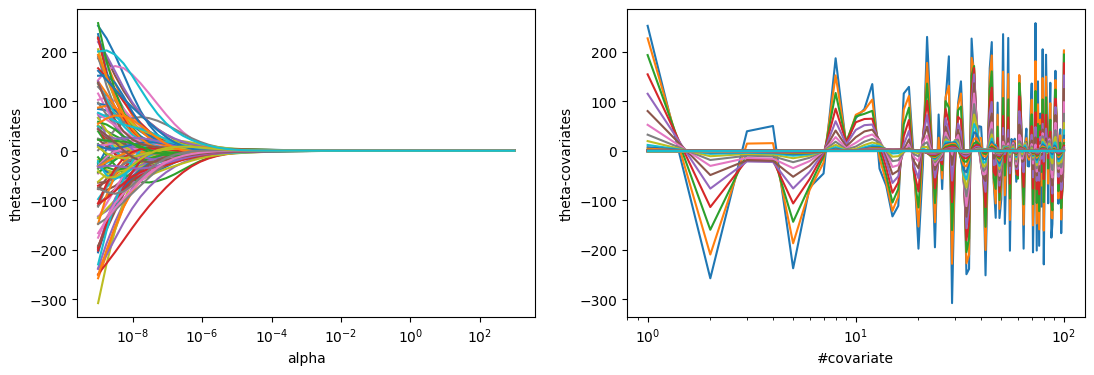

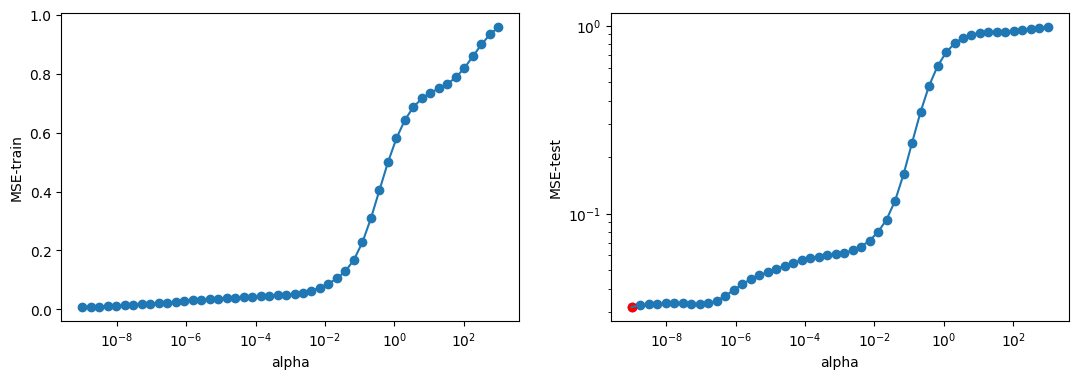

In [75]:
#Code for plotting MSE/Theta covariates
alpha_val = np.logspace(-9, 3)
theta_val = []
theta_norm_val = []
mse_train, mse_test = [], []

# Theta
fig1, (ax0, ax1) = plt.subplots(1,2, figsize=(13,4))
# MSE
fig2, (ax2, ax3) = plt.subplots(1,2, figsize=(13,4))

for alpha_ in alpha_val:
    theta = ridge(X_train, y_train, alpha_)
    theta_val.append(theta)
    theta_norm_val.append(np.linalg.norm(theta))
    mse_train.append(mean_squared_error(y_train, X_train@theta))
    mse_test.append(mean_squared_error(y_test, X_test@theta))
    ax1.plot(range(1, X_train.shape[1]+1), theta)

# Theta-covariate with alpha
ax0.plot(alpha_val, theta_val)
ax0.set_xlabel("alpha")
ax0.set_ylabel("theta-covariates")
ax0.set_xscale("log")

# Theta-covariates
ax1.set_xlabel("#covariate")
ax1.set_ylabel("theta-covariates")
ax1.set_xscale("log")


# MSE-train/test
ax2.scatter(alpha_val, mse_train)
ax2.plot(alpha_val, mse_train)
ax2.set_xscale("log")
ax2.set_xlabel("alpha")
ax2.set_ylabel("MSE-train")
ax3.plot(alpha_val, mse_test)
ax3.scatter(alpha_val, mse_test)
ax3.set_xscale("log")
ax3.set_xlabel("alpha")
ax3.set_ylabel("MSE-test")

## Plot minimum
min_alpha, min_mse_test, best_theta = alpha_val[i:=np.argmin(mse_test)], mse_test[i], theta_val[i]
ax3.scatter(min_alpha, min_mse_test, color="red", label="min-MSE")

plt.yscale("log")
plt.show()

We note that for the training set, $\alpha$ with best $MSE$ value is the smallest is the smallest value $\alpha = 10^{-9}$.

(c)

In [76]:
ridge_reg = Ridge(fit_intercept=False, alpha=min_alpha).fit(X_train, y_train)
R2_ridge = ridge_reg.score(X_test, y_test)
df_coef["Ridge"] = [R2_ridge]
df_coef

,OLS,FVS,SFS,Ridge
R2 Score,0.960055,0.931182,0.93873,0.969224


## Crossvalidation, Lasso and elastic net
### Question 6

We start by running LASSO without touching parameters. We end up with warnings from the Python compiler :

In [77]:
alpha_val = list(10**i for i in range(-5, 3))
theta_val = []
R2_lasso = []
for alpha_ in alpha_val:
    reg_lasso = Lasso(alpha=alpha_)
    reg_lasso.fit(X_train, y_train)
    R2_ = reg_lasso.score(X_test, y_test)
    R2_lasso.append(np.round(R2_, 2))
pd.DataFrame({"alpha":alpha_val, "R2":R2_lasso})

,alpha,R2
0,0.00001,0.85
1,0.00010,0.86
2,0.00100,0.89
3,0.01000,0.89
4,0.10000,0.14
5,1.00000,-0.00
6,10.00000,-0.00
7,100.00000,-0.00


This is due to the fact that we have an objective error $\texttt{tol}$ and a maximum number of iteration of the algorithm $\texttt{max\_iter}$. If the error requirement is not filled within the fixed number of iteration the method displays an error. 
The solution is either to increase the number of iteration (to have a better chance to reach the objective error) or to ease on the error constraint. 

In [78]:
# Reducing tol
R2_lasso = []
alpha_val = list(10**i for i in range(-5, 3))
for alpha_ in alpha_val:
    reg_lasso = Lasso(alpha=alpha_, tol = 1e-1)
    reg_lasso.fit(X_train, y_train)
    R2_ = reg_lasso.score(X_test, y_test)
    R2_lasso.append(np.round(R2_, 2))
pd.DataFrame({"alpha":alpha_val, "R2":R2_lasso})

,alpha,R2
0,0.00001,0.83
1,0.00010,0.84
2,0.00100,0.88
3,0.01000,0.88
4,0.10000,0.13
5,1.00000,-0.00
6,10.00000,-0.00
7,100.00000,-0.00


By easing on $\texttt{tol}$ we end up without error, but the regression is not very efficient.

In [79]:
# Increasing max_iter
R2_lasso = []
alpha_val = np.logspace(-5,3)
mse_train, mse_test = [], []
theta_val = []
non_zero_covariates = []
for alpha_ in alpha_val:
    reg_lasso = Lasso(fit_intercept=False, alpha=alpha_, tol = 1e-1, max_iter=100000)
    reg_lasso.fit(X_train, y_train)
    R2_ = reg_lasso.score(X_test, y_test)
    R2_lasso.append(np.round(R2_, 2))
    theta = reg_lasso.coef_
    theta_val.append(theta)
    non_zero_covariates.append(sum(theta!=0))
    mse_train.append(mean_squared_error(y_train, X_train@theta))
    mse_test.append(mean_squared_error(y_test, X_test@theta))

With $\texttt{max\_iter}$ set to 500000 and $\texttt{tol} = 10^{-3}$, we have much better results, but at the cost of a very slow execution (24s).

(b)

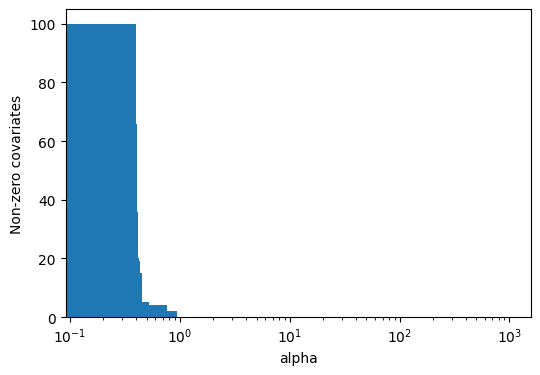

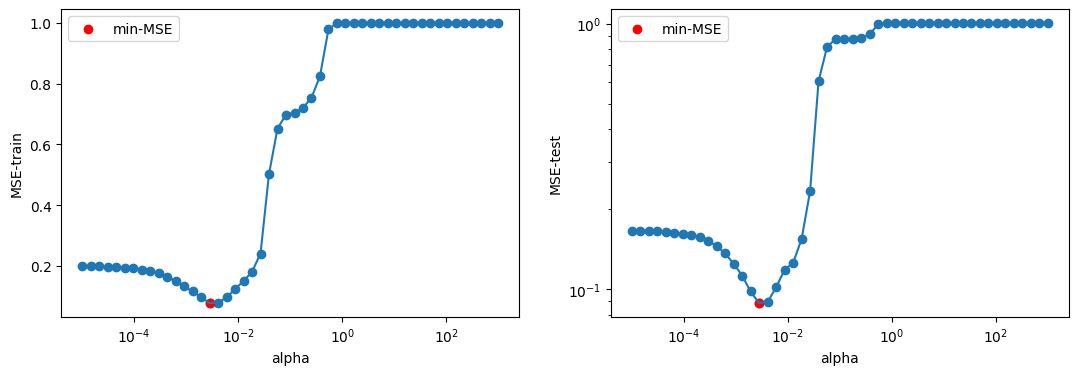

In [80]:
# Code for plotting MSE/Non-Zero Covariates
# Theta
fig1, ax0 = plt.subplots(1,1, figsize=(6,4))
# MSE
fig2, (ax2, ax3) = plt.subplots(1,2, figsize=(13,4))

# Theta non-zero covariates
ax0.bar(alpha_val, non_zero_covariates,)
ax0.set_xlabel("alpha")
ax0.set_ylabel("Non-zero covariates")
ax0.set_xscale("log")

# Theta-covariates
ax1.set_xlabel("#covariate")
ax1.set_ylabel("theta-covariates")
ax1.set_xscale("log")


# MSE-train/test
ax2.scatter(alpha_val, mse_train)
ax2.plot(alpha_val, mse_train)
ax2.set_xscale("log")
ax2.set_xlabel("alpha")
ax2.set_ylabel("MSE-train")
ax3.plot(alpha_val, mse_test)
ax3.scatter(alpha_val, mse_test)
ax3.set_xscale("log")
ax3.set_xlabel("alpha")
ax3.set_ylabel("MSE-test")

## Plot minimum
min_alpha_train, min_mse_train = alpha_val[i:=np.argmin(mse_train)], mse_train[i]
min_alpha_test, min_mse_test, best_theta = alpha_val[i:=np.argmin(mse_test)], mse_test[i], theta_val[i]

ax2.scatter(min_alpha_train, min_mse_train, color="red", label="min-MSE")
ax3.scatter(min_alpha_test, min_mse_test, color="red", label="min-MSE")

ax2.legend()
ax3.legend()

plt.yscale("log")
plt.show()

(d)

In [81]:
lasso_reg = Lasso(fit_intercept=False, alpha=min_alpha_test, tol = 1e-1, max_iter=100000).fit(X_train, y_train)
R2_LASSO = ridge_reg.score(X_test, y_test)
df_coef["LASSO"] = [R2_LASSO]
df_coef

,OLS,FVS,SFS,Ridge,LASSO
R2 Score,0.960055,0.931182,0.93873,0.969224,0.969224


### Question 7

We use K-fold as a cross validation method

In [82]:
# Use all samples
X_tot = np.concatenate([X_train, X_test])
y_tot = np.concatenate([y_train, y_test])

In [83]:
def KFold(X, y, k=10, estimator=ElasticNet()):
    R2_scores = []

    # Shuffling
    idx = np.arange(0, len(y))
    np.random.shuffle(idx)
    Xs = X[idx]
    ys = y[idx]

    #Folding
    X_folds = np.array_split(Xs, k ,axis=0)
    y_folds = np.array_split(ys, k ,axis=0)
   
    for i in range(k):
        X_test_fold, y_test_fold = X_folds[i], y_folds[i]
        X_train_fold = np.concatenate(X_folds[:i] + X_folds[i+1:])
        y_train_fold = np.concatenate(y_folds[:i] + y_folds[i+1:])
        reg = estimator.fit(X_train_fold, y_train_fold)
        R2_scores.append(reg.score(X_test_fold, y_test_fold))
    
    return np.average(R2_scores)

def best_elasticnet_param(alpha_ridge, alpha_lasso):
    best_alpha_ridge, best_alpha_lasso = 0, 0
    R2_best = 0
    for alpha_ in alpha_ridge:
        for l1_ratio_ in alpha_lasso:
            elastic_reg = ElasticNet(alpha=alpha_, l1_ratio=l1_ratio_).fit(X_train, y_train)
            R2_cv = KFold(X_tot, y_tot, k=10, estimator=elastic_reg)
            if R2_cv > R2_best:
                R2_best = R2_cv
                best_alpha_lasso = l1_ratio_
                best_alpha_ridge = alpha_
    print("Best R2 :", R2_best, "|", "alpha =", best_alpha_ridge, "|", "l1_ratio =", best_alpha_lasso)
    return R2_best

In [84]:
warnings.filterwarnings("ignore")

alpha_ridge_ = np.logspace(-10,3)
alpha_lasso_ = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99]

R2_ElasticNet = best_elasticnet_param(alpha_ridge=alpha_ridge_, alpha_lasso=alpha_lasso_)
df_coef["ElasticNet w/ KFold"] = [R2_ElasticNet]
df_coef


Best R2 : 0.9285974569179724 | alpha = 0.002682695795279727 | l1_ratio = 0


,OLS,FVS,SFS,Ridge,LASSO,ElasticNet w/ KFold
R2 Score,0.960055,0.931182,0.93873,0.969224,0.969224,0.928597


I noticed that results can change each time I call the previous function, as shuffling is different each time. 

### Question 8

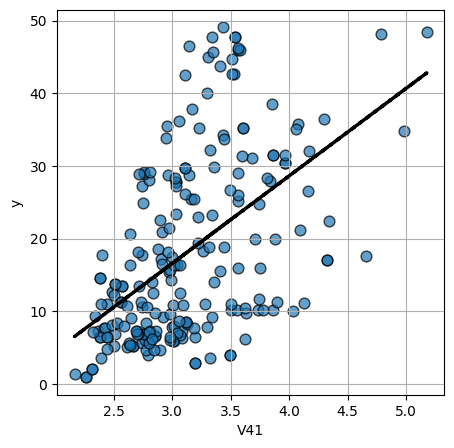

In [85]:
# Dataset with only the variable 40 (V41)
X_40 = X.loc[:, X.columns == "V41"]
X_40 = X_40.to_numpy()
reg_40 = LinearRegression(fit_intercept=True).fit(X_40, y)

# Add scatterplot
fig, ax = plt.subplots(figsize = (5, 5))
ax.scatter(X_40, y, s=60, alpha=0.7, edgecolors="k")

# Regression coefficients
b, a = reg_40.coef_, reg_40.intercept_

# Plot regression line
ax.plot(X_40, a + b * X_40, color="k", lw=2.5, linestyle='dashed')

plt.xlabel("V41")
plt.ylabel("y")
plt.grid()

In [86]:
def bootstrap_plot(X, y, bootstrap_samples=50, estimator=LinearRegression()):
    n, p = X.shape
    fig, ax = plt.subplots(figsize = (10, 10))
    
    for _ in range(bootstrap_samples):
        idx = np.random.randint(len(y), size=len(y))
        X_star = X[idx]
        y_star = y[idx]
        reg = estimator.fit(X_star, y_star)
        B1, B0 = reg.coef_, reg.intercept_

        # Plot bootstrap prediction
        y_pred = (B0 + B1 * X_star).flatten()
        ax.plot(X_star, y_pred, color="k", alpha=.4)

        # Plot prediction intervals
        Xn = np.average(X_star)
        Vn = np.sum((X_star-Xn)**2)
        sigma = np.sqrt(np.sum((y_star-y_pred)**2)/(n-2))
        div = sigma*np.sqrt(1/n + (X_star - Xn)**2/Vn)
        div = div.flatten()
        CI1 = y_pred - div
        CI2 = y_pred + div

        ax.plot(X_star, CI1, color="g", alpha=.4)
        ax.plot(X_star, CI2, color="r", alpha=.4)

    
    X_star = X.reshape(-1,1)
    y_star = y
    reg = estimator.fit(X_star, y_star)
    B1, B0 = reg.coef_, reg.intercept_
    y_pred = (B0 + B1*X_star).flatten()

    Xn = np.average(X_star)
    Vn = np.sum((X_star-Xn)**2)
    sigma = np.sqrt(np.sum((y_star-y_pred)**2)/(n-2))
    div = sigma*np.sqrt(1/n + (X_star - Xn)**2/Vn)
    div = div.flatten()
    CI1 = y_pred - div
    CI2 = y_pred + div

    ax.plot(X_star, CI1, color="g", alpha=.4)
    ax.plot(X_star, CI2, color="r", alpha=.4)
    
    plt.xlabel("V41")
    plt.ylabel("Prediction")
    plt.grid()

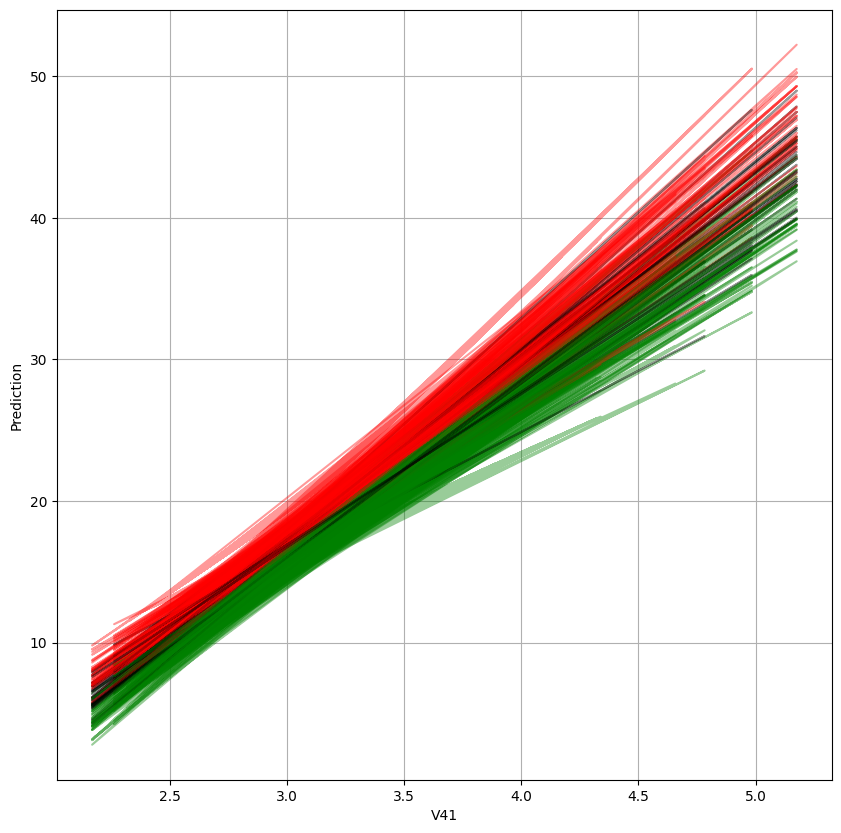

In [87]:
bootstrap_plot(X_40, y)

### Question 9

In [88]:
#PCS before ols regression with svd decomposition
n, p = X_train.shape
G_hat = (X_train.T @ X_train)/n

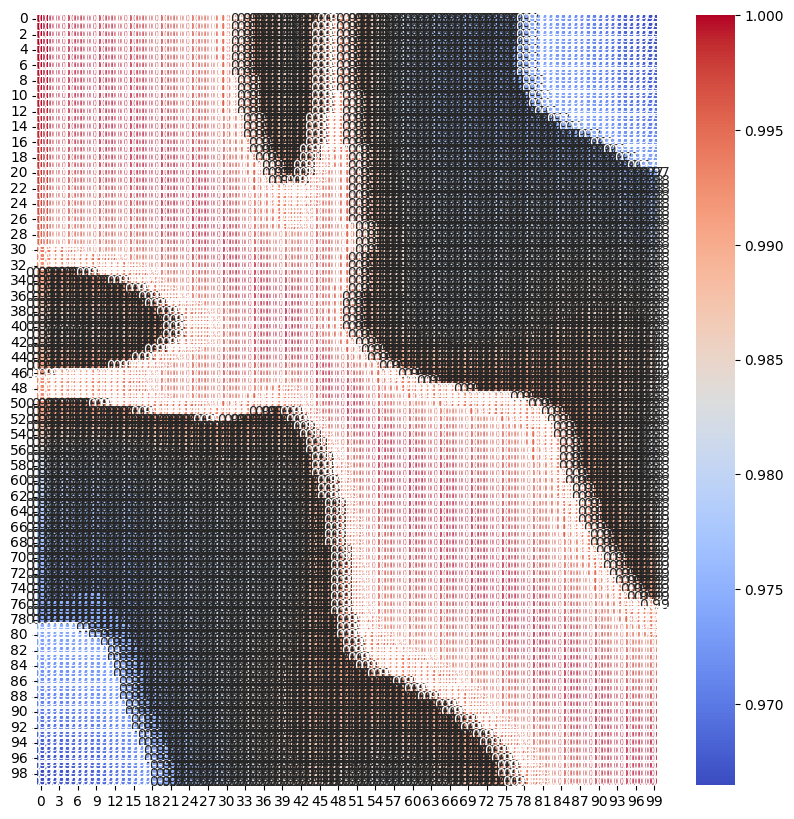

In [89]:
#plot heatmap of the correlation matrix
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(G_hat, ax=ax, cmap="coolwarm", annot=True, fmt=".2f")
plt.show()


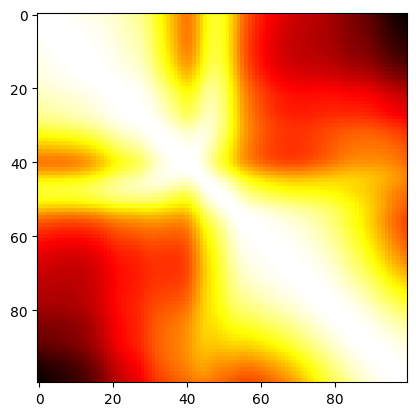

In [90]:
#And the heatmap
plt.imshow(G_hat, cmap="hot")
plt.show()

In [91]:
#SVD decomposition
U, s, V = np.linalg.svd(X_train.T @ X_train)

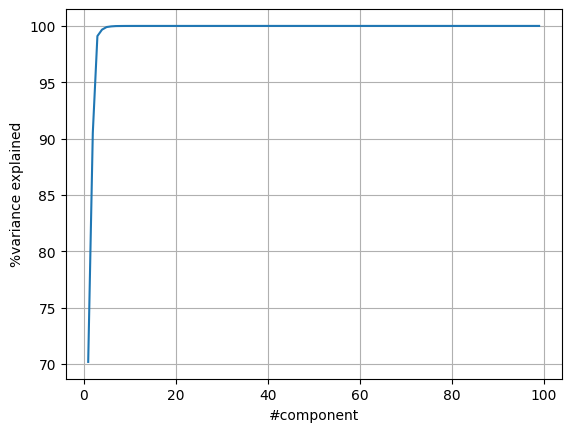

In [92]:
components = range(1,p)
variances = np.array(s)[1:]
variance_explained = 100*variances/np.sum(variances)

plt.plot(components, np.cumsum(variance_explained))
plt.xlabel("#component")
plt.ylabel("%variance explained")
plt.grid()
plt.show()

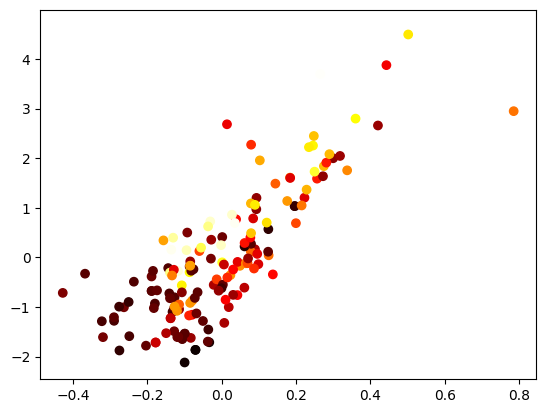

In [93]:
#plot projection on the 2 first components
X_pcs = X_train @ V[:,:2]
plt.scatter(X_pcs[:,0], -X_pcs[:,1], c=y_train, cmap="hot")
plt.show()

We see inverse correlation between the two first components - the more extreme values of y tend to distand from the correlation trend slope. This is due to the fact that the two compoenents are linear combination of the original variables. It is not surprising that they are correlated. Not that thety are inversely correlated so I had to add a minus sign to the second component.

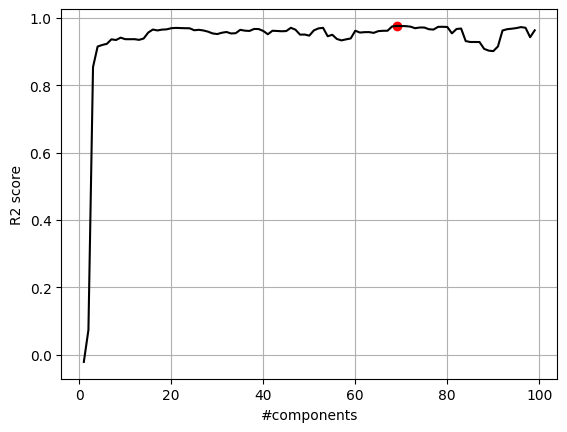

In [94]:
#Run OLS regression on the 2 first components
max_R2_score = 0
R2_score = []
for nb_components in range(1, p):
    X_pcs = X_train @ V[:,:nb_components]
    lr_pcs = LinearRegression(fit_intercept=True).fit(X_pcs, y_train)
    #test regression on X_test data
    X_test_pcs = X_test @ V[:,:nb_components]
    current_R2_score =  lr_pcs.score(X_test_pcs, y_test)
    R2_score.append(current_R2_score)
    if current_R2_score > max_R2_score:
        max_R2_score = current_R2_score
        best_nb_components = nb_components
        best_lr_pcs = lr_pcs
    
#Plot all scores and mark in red the best one
plt.plot(range(1, p), R2_score, color="k")
plt.scatter(best_nb_components, max_R2_score, color="r")
plt.xlabel("#components")
plt.ylabel("R2 score")
plt.grid()
plt.show()

df_coef["OLS-PCA"] = [max_R2_score]

### Conclusion

Here is a summary of the results we obtained for each method. 

In [95]:
df_coef

,OLS,FVS,SFS,Ridge,LASSO,ElasticNet w/ KFold,OLS-PCA
R2 Score,0.960055,0.931182,0.93873,0.969224,0.969224,0.928597,0.976594


To go further, we can use KFold to more accurately estimate the R2 score.

In [96]:
df_coef_cv = pd.DataFrame(index=["R2 Score"])
df_coef_cv["OLS"] = [KFold(X_tot, y_tot, 5, estimator=reg)]
df_coef_cv["FVS"] = [KFold(X_tot, y_tot, 5, estimator=fvs_reg)]
df_coef_cv["SFS"] = [KFold(X_tot, y_tot, 5, estimator=sfs_reg)]
df_coef_cv["Ridge"] = [KFold(X_tot, y_tot, 5, estimator=ridge_reg)]
df_coef_cv["Lasso"] = [KFold(X_tot, y_tot, 5, estimator=lasso_reg)]
df_coef_cv["ElasticNet"] = [R2_ElasticNet]
df_coef_cv["PCA"] = [KFold(X_tot, y_tot, 5, estimator=best_lr_pcs)]
df_coef_cv

,OLS,FVS,SFS,Ridge,Lasso,ElasticNet,PCA
R2 Score,0.909958,0.904394,0.940033,0.929283,0.8995,0.928597,0.887759


We have seen that in a task of linear regression, not all the variables are relevant. Regarding this dataset, only the first principal components can explain nearly all the variance, that is to say those variable are the one which mostly determine the final result vector. We have seen that we can use forward variable selection to select the most relevant variables and this allow limiting overfiting. We have also seen that we can use PCA to reduce the dimension of the problem for that very matter. Ridge and Lasso can help overcome overfitting, but in particular in the case of Lasso, at the expense of computation time. Crossvalidation is a good way to accurately evaluate the performance of a model, even if it is also more computationally expensive.
Elastic net with K-fold crossvalidation may give us a lower R2 score but ensure that the model is not overfitted.
Therefore a tradeoff between computation time and accuracy must be made, keeping in mind that reducing overfitting is a good way to improve the accuracy of the model.